# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


#  Load the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/almond-types-classification/Almond.csv')
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

# **Data Cleaning**

In [3]:
# Create a copy of the original DataFrame for cleaning
df_cleaned = df.copy()

# Handle missing values - example with mean imputation (you can choose other methods)
df_cleaned['Length (major axis)'] = df_cleaned['Length (major axis)'].fillna(df_cleaned['Length (major axis)'].mean())
df_cleaned['Width (minor axis)'] = df_cleaned['Width (minor axis)'].fillna(df_cleaned['Width (minor axis)'].mean())
df_cleaned['Thickness (depth)'] = df_cleaned['Thickness (depth)'].fillna(df_cleaned['Thickness (depth)'].mean())
df_cleaned['Roundness'] = df_cleaned['Roundness'].fillna(df_cleaned['Roundness'].mean())
df_cleaned['Aspect Ratio'] = df_cleaned['Aspect Ratio'].fillna(df_cleaned['Aspect Ratio'].mean())
df_cleaned['Eccentricity'] = df_cleaned['Eccentricity'].fillna(df_cleaned['Eccentricity'].mean())

# Drop the 'Unnamed: 0' column if it's just an index
df_cleaned.drop(columns=['Unnamed: 0'], inplace=True)


# **Exploratory Data Analysis (EDA)**

In [4]:
print(df_cleaned.describe())


       Length (major axis)  Width (minor axis)  Thickness (depth)  \
count          2803.000000         2803.000000        2803.000000   
mean            290.609274          171.025915         109.705378   
std              52.255001           24.374382          15.172405   
min             151.335266           88.050529          59.494278   
25%             264.115860          160.297798         105.398388   
50%             290.609274          171.025915         109.705378   
75%             299.851761          180.152008         115.107212   
max             515.352478          258.569794         181.845200   

               Area    Perimeter    Roundness     Solidity  Compactness  \
count   2803.000000  2803.000000  2803.000000  2803.000000  2803.000000   
mean   26511.117374   743.863770     0.470466     0.955828     1.825233   
std    13782.561344   230.632076     0.098873     0.039596     0.794058   
min     6037.000000   311.563489     0.173748     0.718772     1.164469   
25%

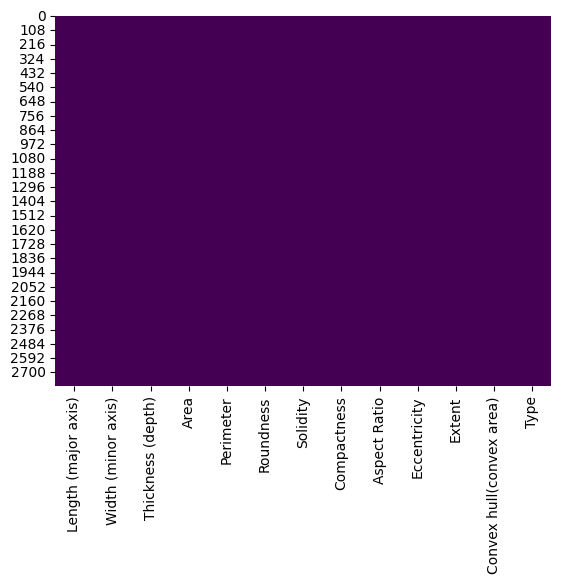

In [5]:
#Missing Values Visualization
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.show()


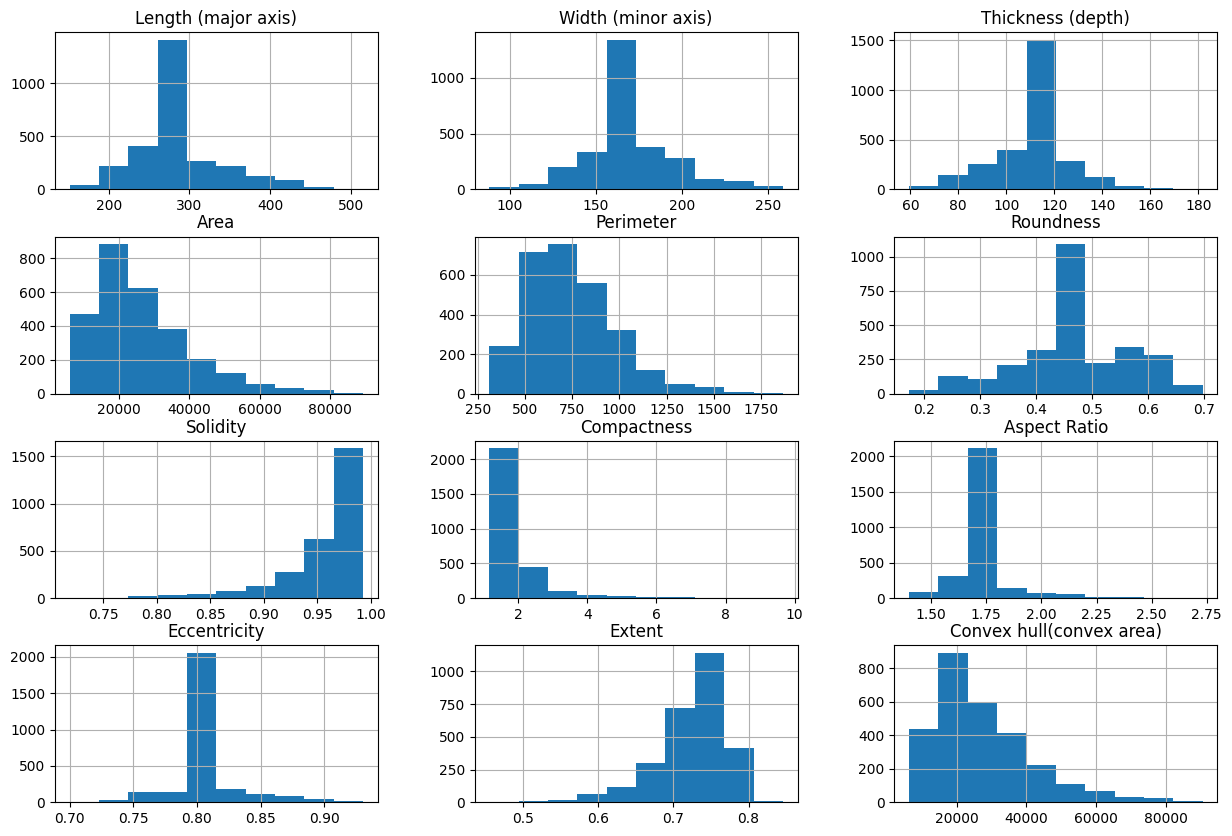

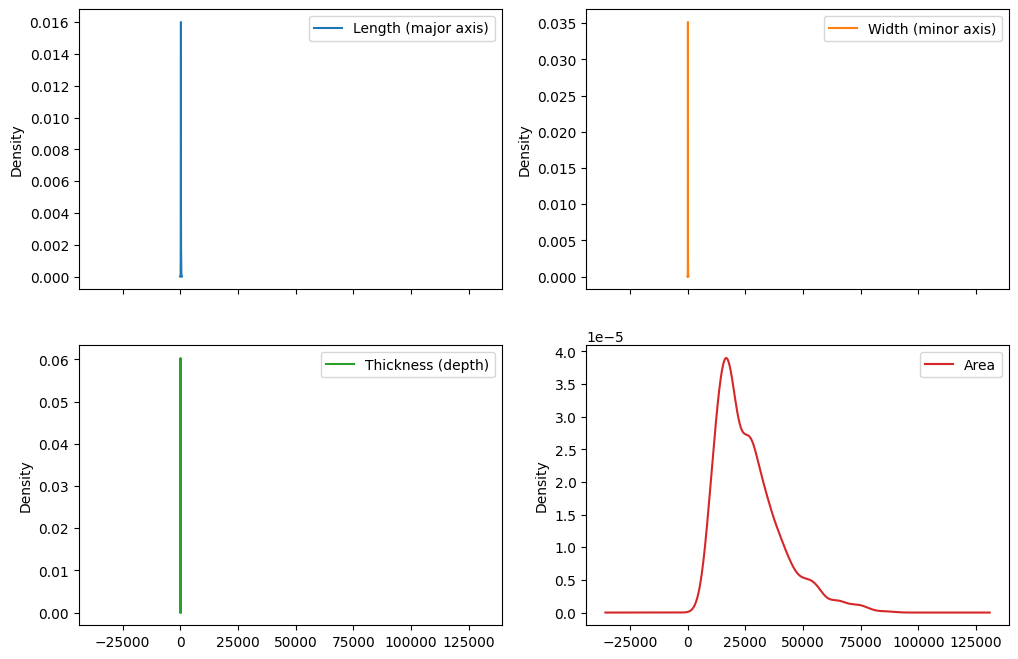

In [6]:
#Distribution Analysis
df_cleaned.hist(figsize=(15, 10))
plt.show()

df_cleaned[['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)', 'Area']].plot(kind='kde', subplots=True, layout=(2, 2), figsize=(12, 8))
plt.show()


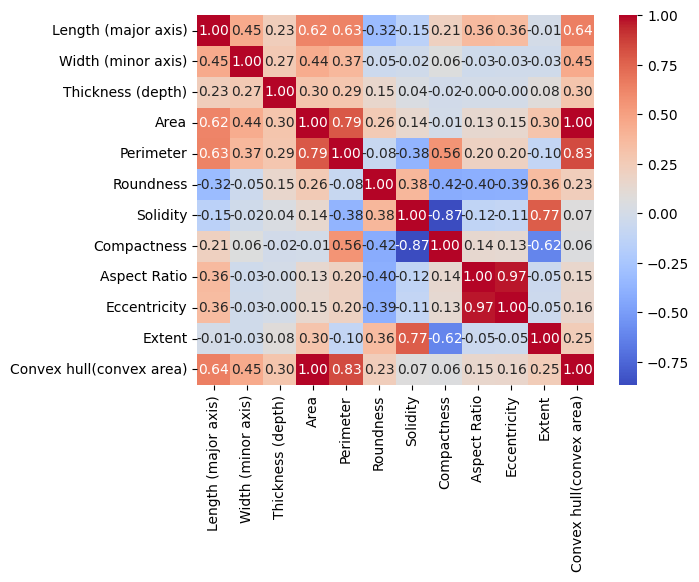

In [7]:
# Exclude non-numeric columns
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric data only
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.show()


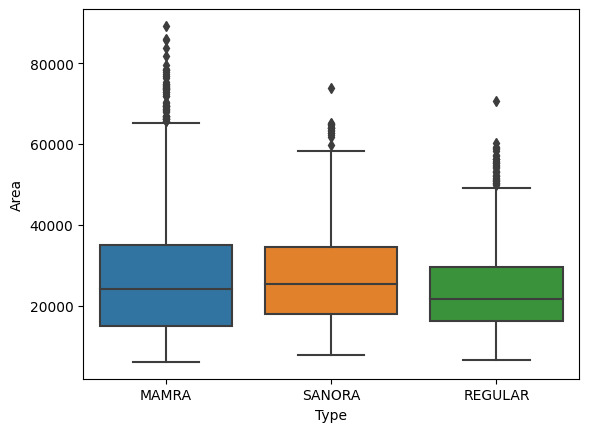

In [8]:
#Box Plot Analysis
sns.boxplot(x='Type', y='Area', data=df_cleaned)
plt.show()


#  Feature Scaling

In [9]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned.drop(['Type'], axis=1)), columns=df_cleaned.columns[:-1])
df_scaled['Type'] = df_cleaned['Type']


# **Splitting the Data**

In [10]:
X = df_scaled.drop('Type', axis=1)
y = df_scaled['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model Training & Evaluation

In [11]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Confusion Matrix & Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[252  23  12]
 [  9 231  38]
 [ 11  29 236]]
              precision    recall  f1-score   support

       MAMRA       0.93      0.88      0.90       287
     REGULAR       0.82      0.83      0.82       278
      SANORA       0.83      0.86      0.84       276

    accuracy                           0.85       841
   macro avg       0.86      0.85      0.85       841
weighted avg       0.86      0.85      0.86       841



# **Feature Importance**

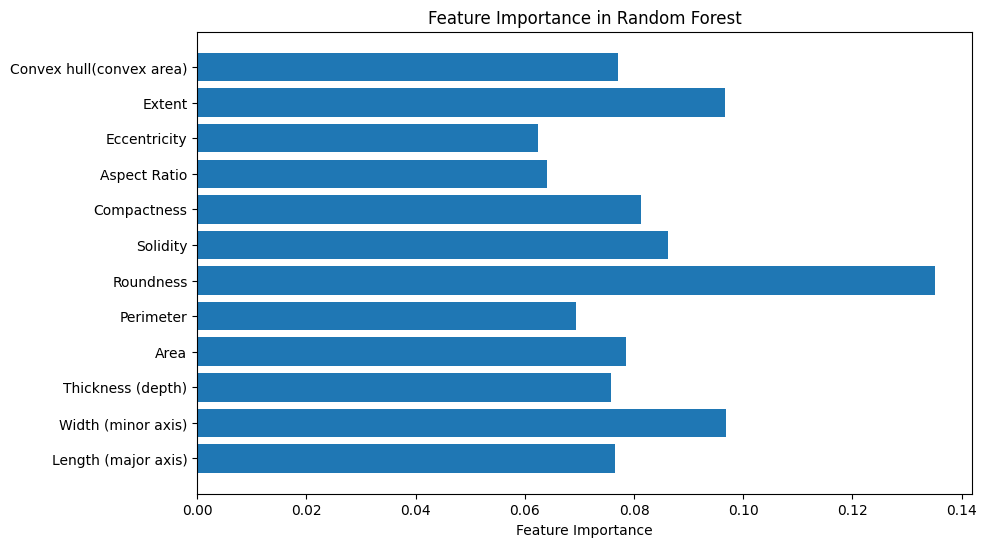

In [12]:
importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()
